# Recommendation System Demo

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import load_data, plot_age_distribution, plot_book_year_distribution, plot_rating_distribution, recommend_items_to_user
from personalization_index import *

## Dataset

In [2]:
items_df, users_df, ratings_df, all_ratings_df = load_data()

### User data

In [3]:
users_df.head()

,user_id,location,age,age_group
11,12,"fort bragg, california, usa",32.0,19-35
15,16,"albuquerque, new mexico, usa",32.0,19-35
25,26,"bellevue, washington, usa",32.0,19-35
31,32,"portland, oregon, usa",32.0,19-35
38,39,"cary, north carolina, usa",32.0,19-35


#### Age distribution

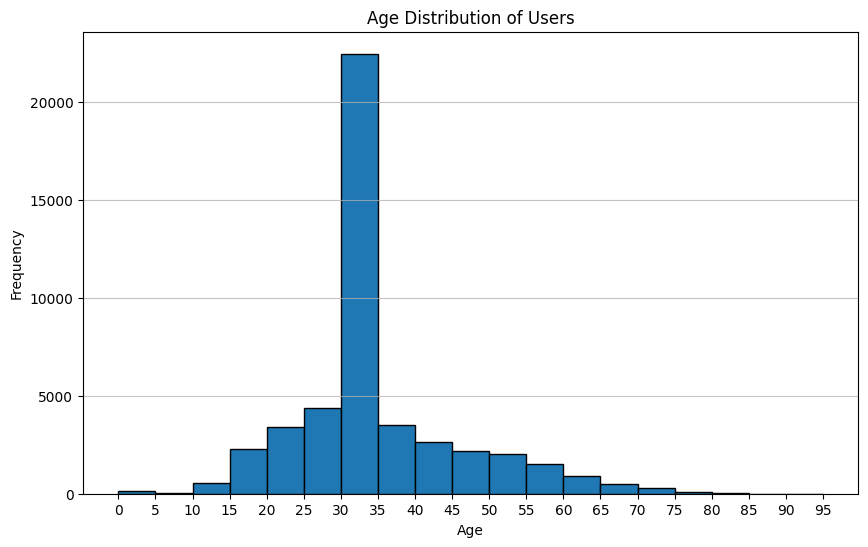

In [4]:
plot_age_distribution(users_df)

### Item data

In [5]:
items_df.head(5)

,item_id,title,author,Year-Of-Publication,publisher,Image-URL-S,Image-URL-M,Image-URL-L
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...


#### Publish year distribution

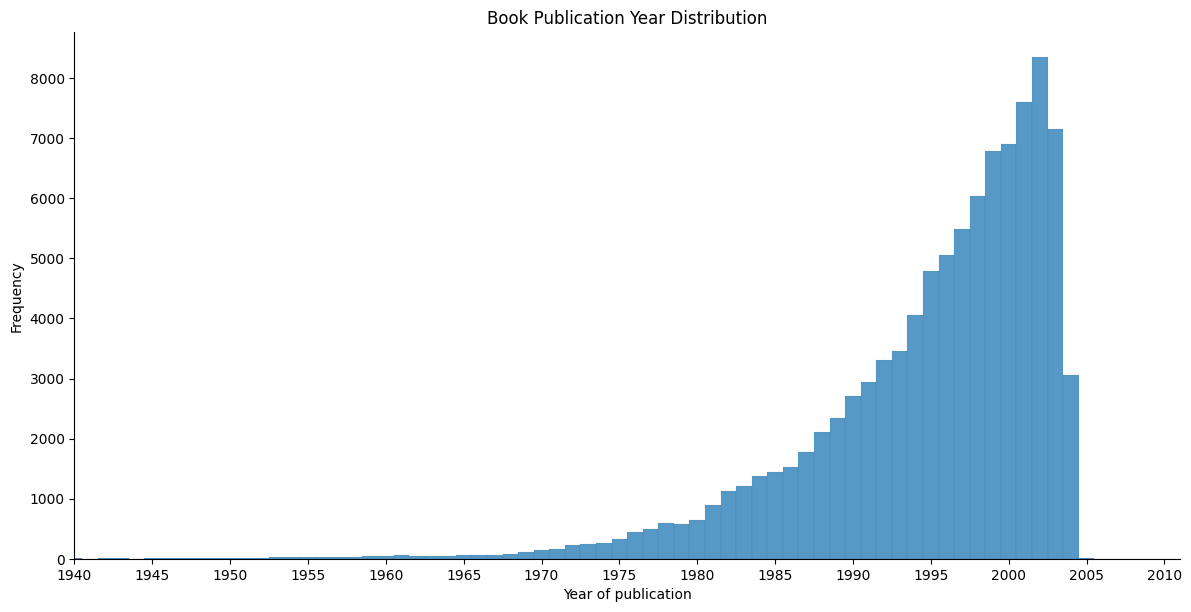

In [6]:
plot_book_year_distribution(items_df)

### Rating data

In [7]:
ratings_df.head(5)

,user_id,item_id,rating
16,276747,0060517794,9
19,276747,0671537458,9
20,276747,0679776818,8
27,276751,3596218098,8
28,276754,0684867621,8


#### Rating distribution

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


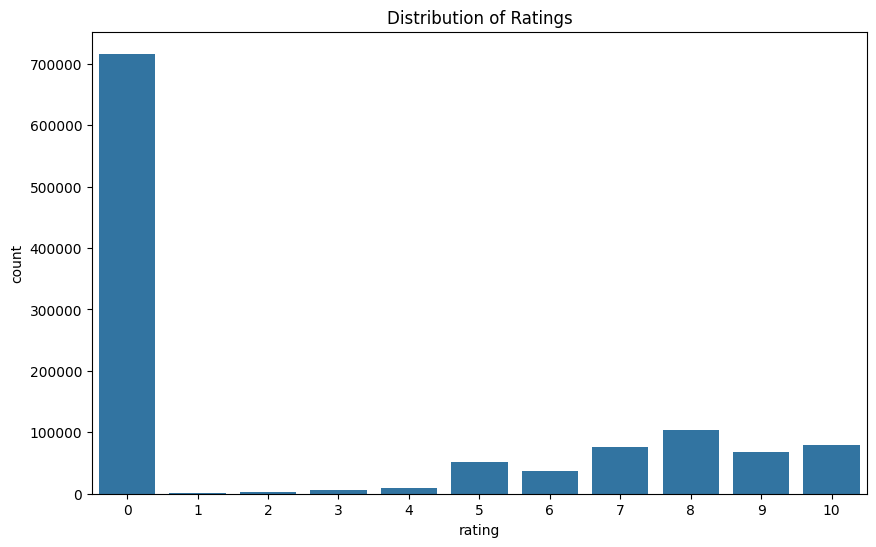

In [8]:
plot_rating_distribution(all_ratings_df)

#### User-item graph

## Engine Output

### Top-5 recommendation and top favorites for a given user

Top 5 recommendations for user 26:
1. Clara Callan by Richard Bruce Wright published in 2001
2. The Kitchen God's Wife by Amy Tan published in 1991
3. Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It by Gina Bari Kolata published in 1999
4. A Second Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series) by Jack Canfield published in 1998
5. Decision in Normandy by Carlo D'Este published in 1991
----------------------------------------------------------------------------------------
Top favorite items for user 26:
1. To Kill a Mockingbird by Harper Lee published in 1988
2. Seabiscuit: An American Legend by LAURA HILLENBRAND published in 2002


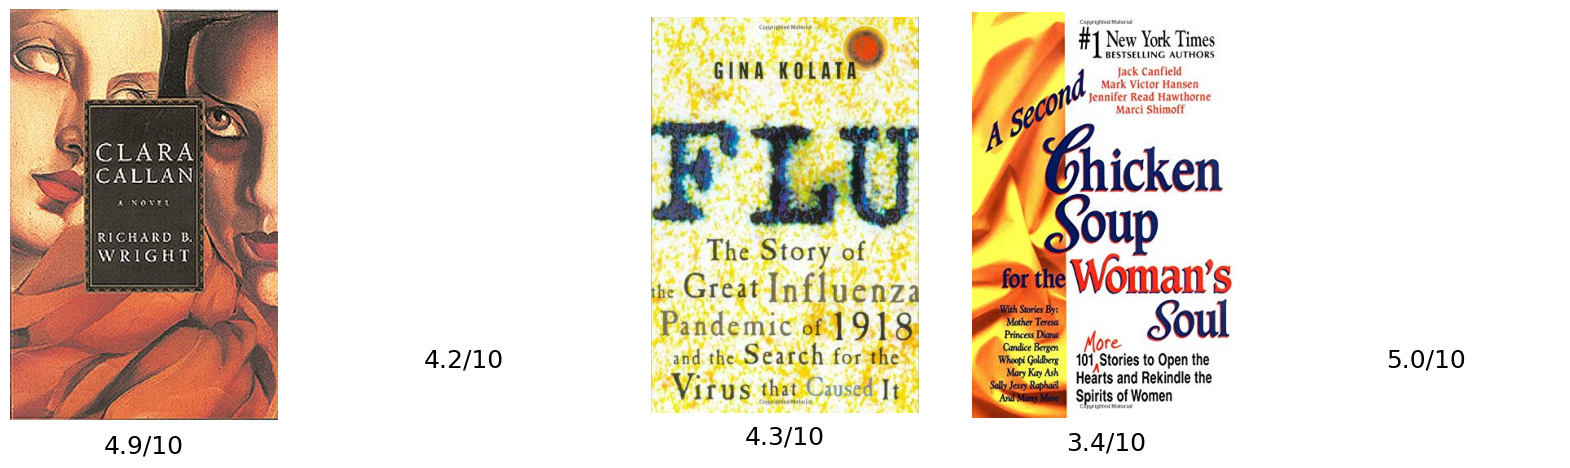

In [11]:
recommend_items_to_user(26)

Top 5 recommendations for user 2651:
1. Bleachers by John Grisham published in 2003
2. The Rescue by Nicholas Sparks published in 2001
3. Sisterhood of the Traveling Pants by ANN BRASHARES published in 2003
4. Only Love (Magical Love) by Erich Segal published in 1998
5. Silent Snow by Steve Thayer published in 2000
----------------------------------------------------------------------------------------
Top favorite items for user 2651:
1. The Bear and the Dragon (Jack Ryan Novels) by Tom Clancy published in 2001
2. Throne of Isis by Judith Tarr published in 1995
3. Without Remorse by Tom Clancy published in 2004


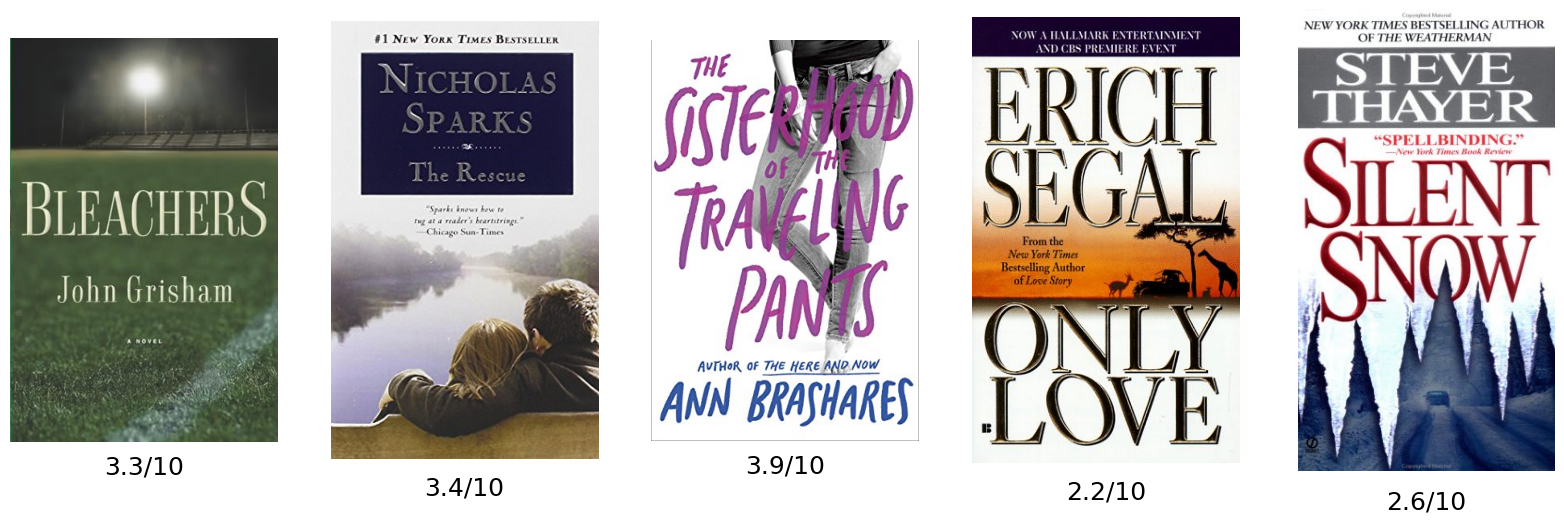

In [16]:
recommend_items_to_user(2651)

Top 5 recommendations for user 2655:
1. The League of Extraordinary Gentlemen, Vol. 1 by Alan Moore published in 2002
2. The War in Heaven (Eternal Warriors) by Theodore Beale published in 2000
3. The Folk of the Faraway Tree by Enid Blyton published in 2002
4. Eva Luna by Isabel Allende published in 1989
5. Catch 22 by Joseph Heller published in 1996
----------------------------------------------------------------------------------------
Top favorite items for user 2655:
1. La Compagnia by Benni published in 1993


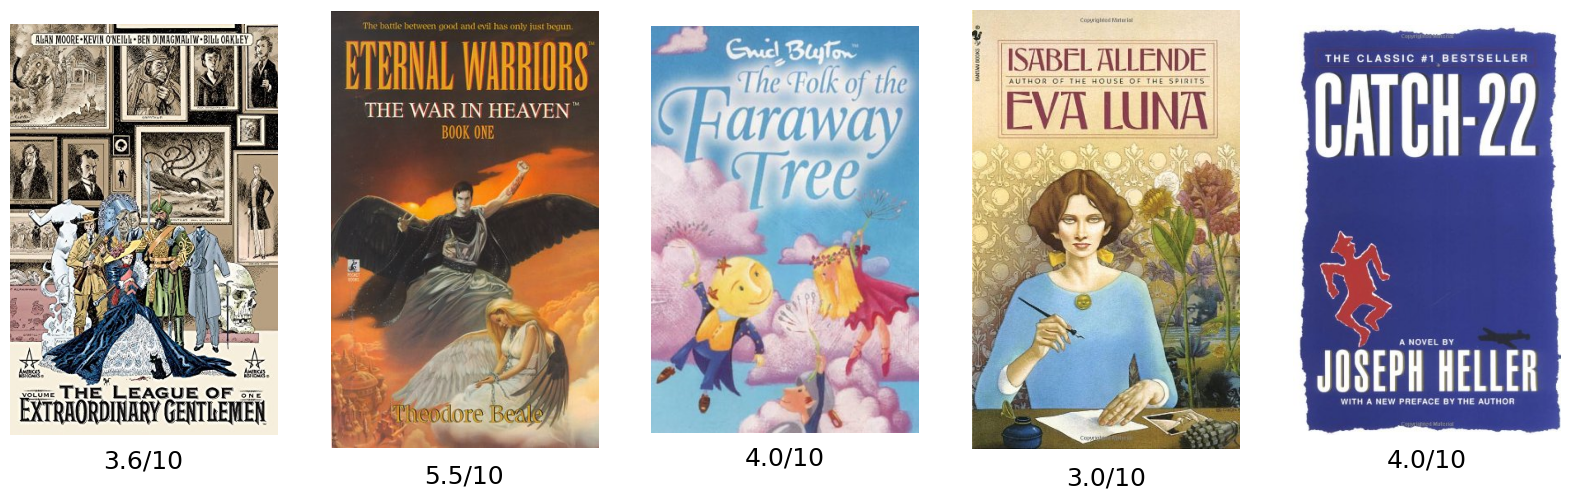

In [17]:
recommend_items_to_user(2655)

## Engine Performance Metrics

### Personalization Index

In [3]:
df = load_result()

#### Simpson diversity index

In [4]:
start_time = time.time()
simpson_diversity_index = simpson_diversity_index(df)
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.3f} seconds")
print(f"Simpson Diversity Index: {simpson_diversity_index:.4f}")

Execution time: 0.048 seconds
Simpson Diversity Index: 0.9329


#### Jaccard distance

In [ ]:
start_time = time.time()
personalization_index = pairwise_jaccard_distances(df)
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.3f} seconds")
print(f"Personalization Index: {personalization_index:.4f}")

In [5]:
# this one failed on the new dataset
start_time = time.time()
sparse_matrix = create_sparse_matrix(df)
personalization_index = pairwise_jaccard_similarity_sparse(sparse_matrix)
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.3f} seconds")
print(f"Personalization Index: {personalization_index:.4f}")

NotImplementedError: subtracting a sparse array from a nonzero scalar is not supported

### Distribution Chart

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/Users/kevin/AIME/GNN-Recommendation-System/personalization_index.py:225: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_freq_df_sorted_by_percentage.index, y=y_column, data=item_freq_df_sorted_by_percentage, palette=palette)
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


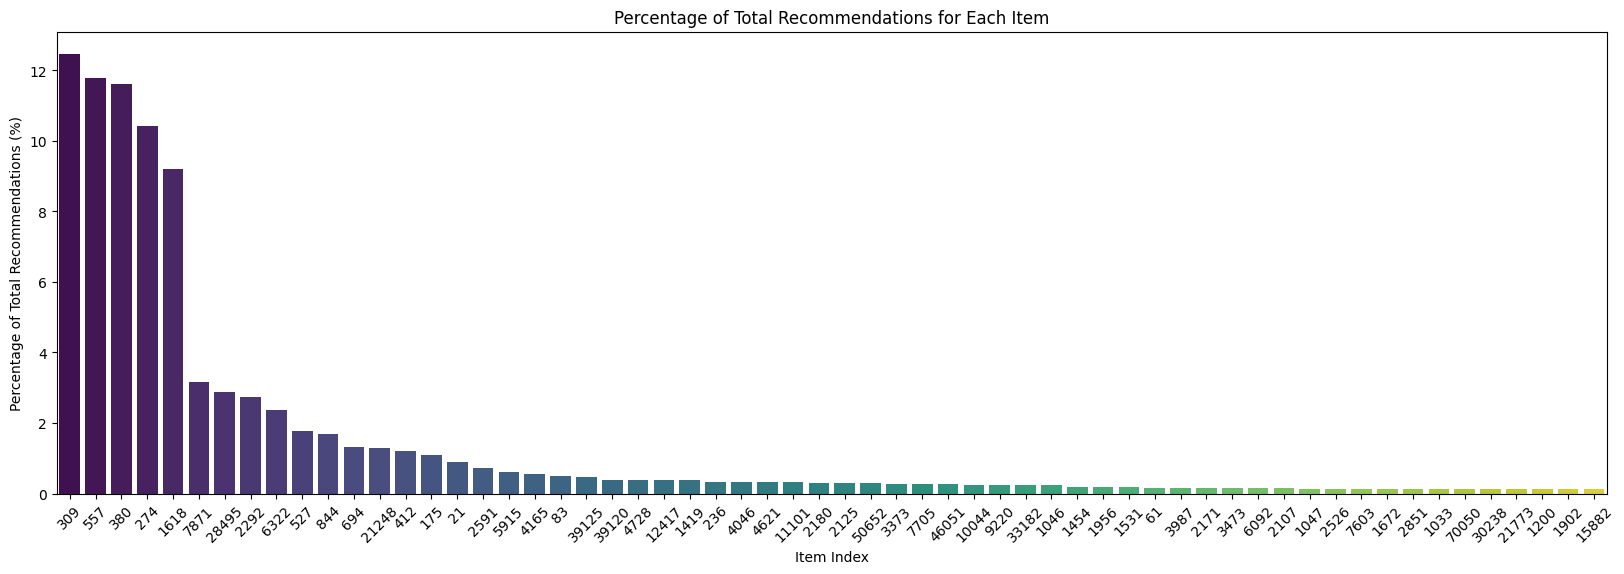

In [4]:
plot2_item_percentage_bar(df)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/Users/kevin/AIME/GNN-Recommendation-System/personalization_index.py:225: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_freq_df_sorted_by_percentage.index, y=y_column, data=item_freq_df_sorted_by_percentage, palette=palette)
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


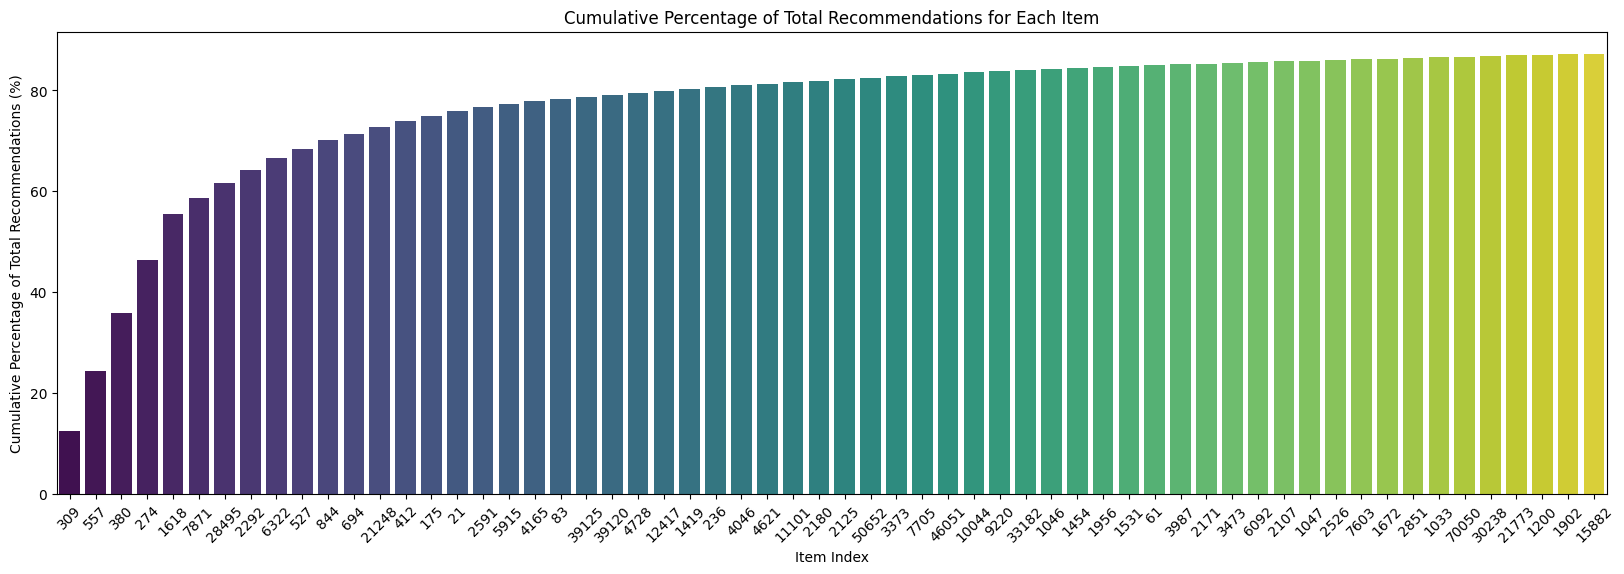

In [5]:
plot2_item_percentage_bar(df, cumulative=True)

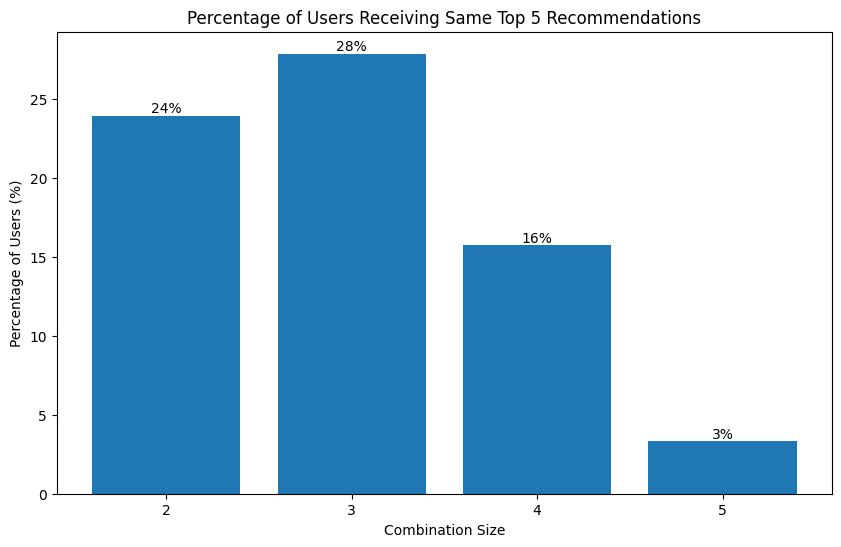

In [4]:
plot_same_recommendations(df)